In [1]:
using PyPlot, Interact, DSP;

In [2]:
j=im; 
N = 500; # FFT size

500

$$ \text{squareWave}(t) = \begin{cases} 1 & \text{if $0 < t < 0.5$} \\ -1 & \text{if $0.5 < t < 1$} \end{cases}$$

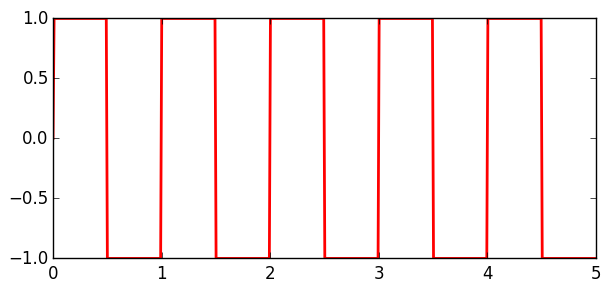

In [3]:
T₀=1 #Period
Fₛ=100 #sampling frequency

x_sq(t) = sign(sin(2π*t/T₀)); #define square wave
t=linspace(0,5,Fₛ*5); 
fig_square = figure("Square Wave",figsize=(7,3)); 
plot(t, x_sq(t), color="red", linewidth=2.0);

## Low Pass Filter
 
$$H(j\omega) =  \frac{\alpha}{\alpha+j\omega} $$
 

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"α",10,1:10:101,true)

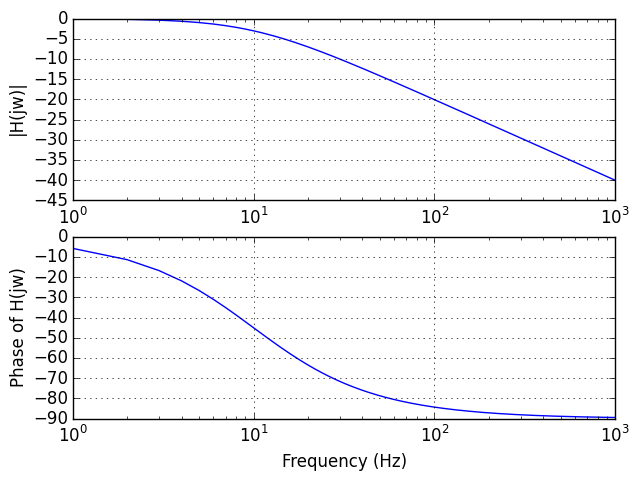

In [4]:
fig_lpf = figure("FFT Square Wave LPF",figsize=(7,5))
@manipulate for α in slider(1:10:101, value=10, label="α"); withfig(fig_lpf) do
        ω=linspace(1,1000,1000); 
        H=α./(α+j*ω);

        subplot(211); grid("on"); ylabel("|H(jw)|");
        semilogx(ω, 20log10(abs(H)))

        subplot(212); grid("on"); xlabel("Frequency (Hz)"); ylabel("Phase of H(jw)");
        semilogx(ω, atan(imag(H)./real(H))*(360/2π))
end end

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"α",10,1:5:16,true)

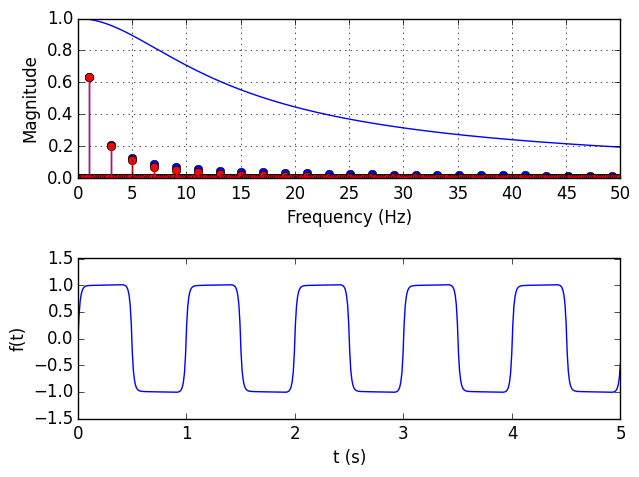

 in depwarn at deprecated.jl:73
 in to_index at deprecated.jl:447
 in getindex at array.jl:309
 in anonymous at In[5]:11
 in withfig at /home/macalvin/.julia/v0.4/PyPlot/src/PyPlot.jl:639
 in anonymous at In[5]:5
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/macalvin/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/macalvin/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[5], in expression starting on line 5


In [5]:
fig_lpf = figure("FFT Square Wave LPF",figsize=(7,5)); subplots_adjust(hspace=0.5,wspace=0.5)
period = linspace(0,N/Fₛ,N);
a = fft(Float64[x_sq(t) for t in period])./N 

@manipulate for α in slider(1:5:20, value=10, label="α"); withfig(fig_lpf) do
        subplot(211)        
        hold("on"); grid("on"); 
        ylabel("Magnitude"); xlabel("Frequency (Hz)"); xticks(0:Fₛ/20:Fₛ/2);
        
        x=linspace(0,Fₛ/2,N/2); #FS plot
        stem(x,abs(a[1:round(N/2)])); 

        ω=linspace(0,Fₛ/2,N/2); #LPF plot
        H=α./(α+j*ω);
        plot(ω, abs(H))

        stem(ω, abs(H.*a[1:round(N/2)]),linefmt="r-", markerfmt="ro", basefmt="r-"); #Attenuated plot
        
        subplot(212); #Reconstruction
        H2 = [H[1:N/2] ;flipdim(H[1:N/2],1)]
        plot(period,ifft(H2.*a).*N); 
        ylabel("f(t)"); xlabel("t (s)"); 

    end
end


## High Pass Filter

$$ H(j\omega) =  \frac{j\omega}{a+j\omega}$$


Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"α",10,1:10:91,true)

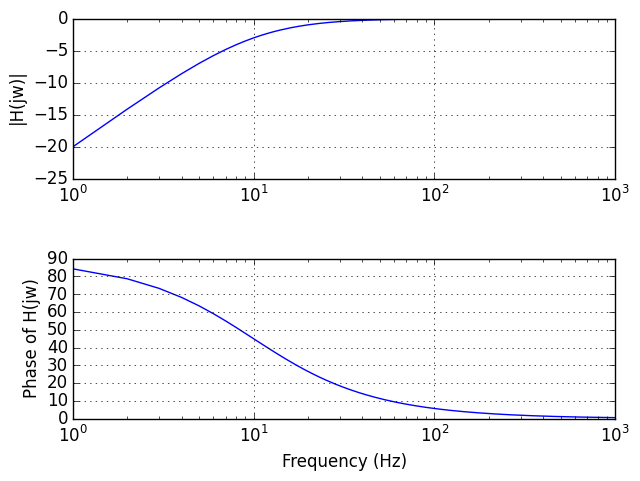

In [6]:
fig_hpf = figure("FFT Square Wave LPF",figsize=(7,5))
@manipulate for α in slider(1:10:100, value=10, label="α"); withfig(fig_hpf) do
        ω=linspace(1,1000,1000)
        H=(j*ω)./(α+j*ω);

        subplot(211); grid("on"); ylabel("|H(jw)|");
        semilogx(ω, 20log10(abs(H)))

        subplot(212); grid("on"); xlabel("Frequency (Hz)"); ylabel("Phase of H(jw)");
        semilogx(ω, atan(imag(H)./real(H))*(360/2π))
    end
end

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"α",10,1:5:16,true)

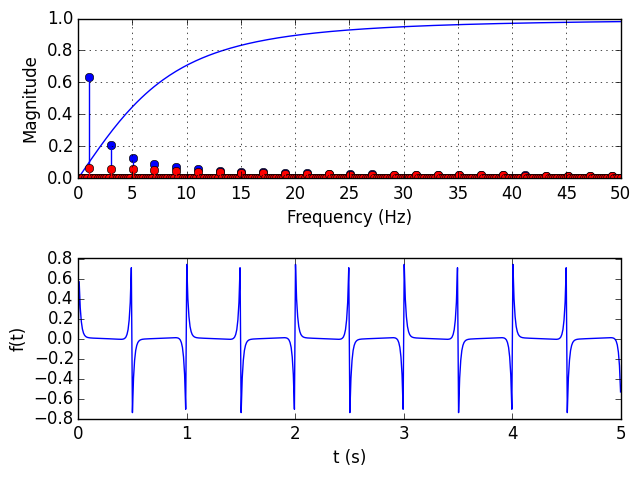

In [7]:
fig_hpf = figure("FFT Square Wave HPF",figsize=(7,5))
subplots_adjust(hspace=0.5,wspace=0.5)
period = linspace(0,N/Fₛ,N);
a = fft(Float64[x_sq(t) for t in period])./N 

@manipulate for α in slider(1:5:20, value=10, label="α"); withfig(fig_hpf) do
        subplot(211)        
        hold("on"); grid("on"); 
        ylabel("Magnitude"); xlabel("Frequency (Hz)"); xticks(0:Fₛ/20:Fₛ/2);
        
        x=linspace(0,Fₛ/2,N/2); #FS plot
        stem(x,abs(a[1:round(N/2)])); 

        ω=linspace(0,Fₛ/2,N/2); #LPF plot
        H=(j*ω)./(α+j*ω);
        plot(ω, abs(H))

        stem(ω, abs(H.*a[1:round(N/2)]),linefmt="r-", markerfmt="ro", basefmt="r-"); #Attenuated plot
        
        subplot(212); #Reconstruction
        H2 = [H[1:N/2] ;flipdim(H[1:N/2],1)]
        plot(period,ifft(H2.*a).*N); 
        ylabel("f(t)"); xlabel("t (s)"); 
    end
end